# Dataset creation and analysis
Since many accounts are not active since the training of bimbas, I will recreate the train and test dataset to keep them balanced.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('../resources/data/ghmap_features.csv')
display(dataset.head())
# Old contributor list
train_old = pd.read_csv('../resources/data/train_contributors.csv')
test_old = pd.read_csv('../resources/data/test_contributors.csv')
total_old = pd.concat([train_old, test_old])

# New contributors
train = dataset[dataset['dataset'] == 'train']
test = dataset[dataset['dataset'] == 'test']

print(f"Old dataset size {total_old.shape[0]}")
print(f"New dataset size: {dataset.shape[0]}")

,contributor,dataset,label,DAAR_IQR,DAAR_gini,DAAR_mean,DAAR_median,DAAR_std,DCAR_IQR,DCAR_gini,...,NCAR_median,NCAR_std,NOR,NT,NTR_IQR,NTR_gini,NTR_mean,NTR_median,NTR_std,ORR
0,kaczmarj,train,Human,44.184,0.593,43.242,22.819,52.922,8.141,0.641,...,1.5,1.829,7,9,2.0,0.333,2.0,1.0,1.414,0.778
1,plasmapy-requirements-bot[bot],train,Bot,NaN,0.000,NaN,NaN,0.000,0.000,0.000,...,27.0,0.000,1,3,0.0,0.000,3.0,3.0,0.000,1.000
2,accesslint[bot],train,Bot,17.185,0.590,16.049,10.432,21.498,0.144,0.645,...,1.0,0.764,27,1,0.0,0.000,1.0,1.0,0.000,1.000
3,blueztestbot,train,Bot,4.884,0.754,7.885,2.066,15.635,2.969,0.752,...,3.0,4.551,2,6,1.5,0.208,3.0,3.5,1.414,0.500
4,thundernest-bot,train,Bot,NaN,0.000,NaN,NaN,0.000,0.000,0.000,...,300.0,0.000,1,1,0.0,0.000,1.0,1.0,0.000,1.000


Old dataset size 2149
New dataset size: 1875


# 1 -  Bot/Human balance analysis
In this section, we will analyze the datasets to understand if the repartition of bot and human is still the same. We will also find the quantity of contributors that are not active anymore.

## 1.1 - Bot and Human repartition

TLDR; The repartition of bot and humans mostly stayed the same. Before: Bot=48% and Human=52%. After: Bot=49% and Human=51%. (It's exactly the same for the train and test datasets)

In [4]:
def compare_bot_human_repartition(old_dataset, new_dataset):
    """
    Compare the bot and human percentage in the old and new dataset
    - Old dataset : Coming from RABBIT without removing the inactive contributors. (Column "bot" [0, 1])
    - New dataset : old dataset but without users not active anymore (Column "label" ['Bot', 'Human'])
    """
    bot_prop_old = old_dataset[old_dataset['bot'] == 1].shape[0] / old_dataset.shape[0]
    human_prop_old = old_dataset[old_dataset['bot'] == 0].shape[0] / old_dataset.shape[0]

    print(f"Percentage of bot in the old dataset: {format(bot_prop_old, '.2f')}")
    print(f"Percentage of human in the old dataset: {format(human_prop_old, '.2f')}")

    bot_prop_new = new_dataset[new_dataset['label'] == 'Bot'].shape[0] / new_dataset.shape[0]
    human_prop_new = new_dataset[new_dataset['label'] == 'Human'].shape[0] / new_dataset.shape[0]

    print(f"Percentage of bot in the new dataset: {format(bot_prop_new, '.2f')}")
    print(f"Percentage of human in the new dataset: {format(human_prop_new, '.2f')}")


In [5]:
compare_bot_human_repartition(total_old, dataset)

Percentage of bot in the old dataset: 0.48
Percentage of human in the old dataset: 0.52
Percentage of bot in the new dataset: 0.49
Percentage of human in the new dataset: 0.51


In [6]:
# Train data
compare_bot_human_repartition(train_old, train)


Percentage of bot in the old dataset: 0.48
Percentage of human in the old dataset: 0.52
Percentage of bot in the new dataset: 0.49
Percentage of human in the new dataset: 0.51


In [7]:
# Test data
compare_bot_human_repartition(test_old, test)

Percentage of bot in the old dataset: 0.48
Percentage of human in the old dataset: 0.52
Percentage of bot in the new dataset: 0.49
Percentage of human in the new dataset: 0.51


## 1.2 - Inactive contributors

TLDR;
- 14% of the contributors are not active anymore (14% in train and 11% in test)
- The train/test split is thus not the same anymore but is still balanced (59% train and 41% test)


In [8]:
missing_train = train_old[~train_old['contributor'].isin(train['contributor'])]
missing_test = test_old[~test_old['contributor'].isin(test['contributor'])]

print(f"Total missing contributors in the train dataset: {format(missing_train.shape[0]/train_old.shape[0], '.2f')}")

# Get the percentage of missing contributors
print(f"Percentage of missing contributors in the train dataset: {format(missing_train.shape[0] / train_old.shape[0], '.2f')}")
print(f"Percentage of missing contributors in the test dataset: {format(missing_test.shape[0] / test_old.shape[0], '.2f')}")

Total missing contributors in the train dataset: 0.14
Percentage of missing contributors in the train dataset: 0.14
Percentage of missing contributors in the test dataset: 0.11


In [9]:
# Old separation train/test
print(f"Percentage of training data in the old dataset: {format(train_old.shape[0] / total_old.shape[0], '.2f')}")
print(f"Percentage of testing data in the old dataset: {format(test_old.shape[0] / total_old.shape[0], '.2f')}")

# New separation train/test
print(f"Percentage of training data in the new dataset: {format(train.shape[0] / dataset.shape[0], '.2f')}")
print(f"Percentage of testing data in the new dataset: {format(test.shape[0] / dataset.shape[0], '.2f')}")

Percentage of training data in the old dataset: 0.60
Percentage of testing data in the old dataset: 0.40
Percentage of training data in the new dataset: 0.59
Percentage of testing data in the new dataset: 0.41


# 2 - Contributors activity analysis
In this section, we will analyze if the distribution of the number of activities is the same for test and train datasets.

TLDR; It seems to be the case. (Verify correctly ?)

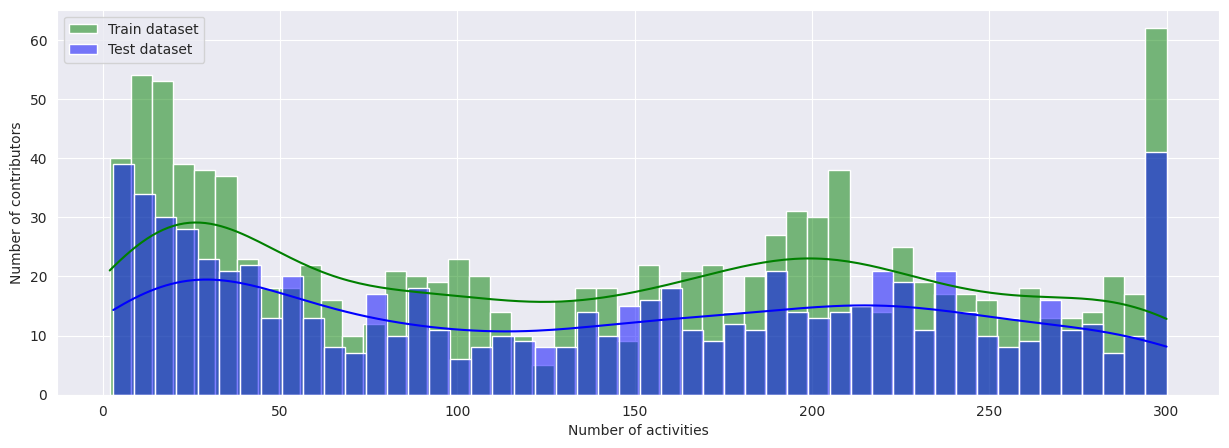

In [16]:
plt.figure(figsize=(15, 5))
sns.histplot(train['NA'], bins=50, color='green', label='Train dataset', kde=True)
sns.histplot(test['NA'], bins=50 , color='blue', label='Test dataset', kde=True)
plt.xlabel('Number of activities')
plt.ylabel('Number of contributors')
plt.legend()
plt.show()


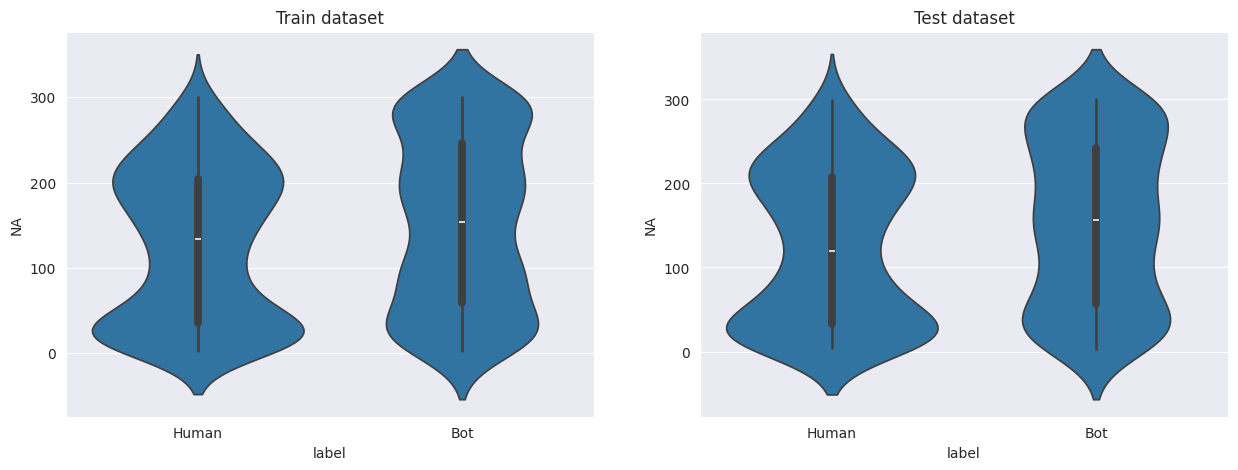

In [11]:
train_NA = train[['NA', 'label']]
test_NA = test[['NA', 'label']]


# Box plot to compare the activity of bots and humans
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(x='label', y='NA',data=train_NA, ax=ax[0], order=['Human', 'Bot'])
ax[0].set_title('Train dataset')
sns.violinplot(x='label', y='NA',data=test_NA, ax=ax[1], order=['Human', 'Bot'])
ax[1].set_title('Test dataset')
plt.show()

